<a href="https://colab.research.google.com/github/gongx030/dream_PGE/blob/main/notebooks/rsgdream2022_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Make plots for the Proformer talk in RSG/DREAM 2022

## Load Python packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
import gspread
from google.auth import default

## Average pooling on large models failed to converge

In [ ]:
creds, _ = default()
gc = gspread.authorize(creds)
sh = gc.open('proformer_project')

In [ ]:
worksheet = sh.worksheet("d256_b8")

In [ ]:
rows = worksheet.get_all_values()
df = pd.DataFrame.from_records(rows[1:])
df.columns = rows[0]
df['epoch'] = df['epoch'].astype('category')
df['pearsonr'] = df['pearsonr'].astype('float32')
df['val_pearsonr'] = df['val_pearsonr'].astype('float32')

### Training

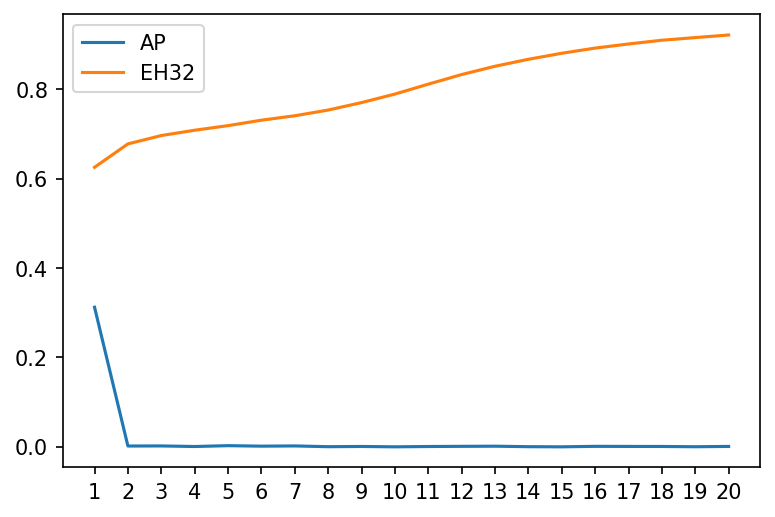

In [ ]:
for g in ['AP', 'EH32']:
  x = df[df['group'] == g]['epoch']
  y = df[df['group'] == g]['pearsonr']
  plt.plot(x, y, label = g)
plt.legend()

### Validation

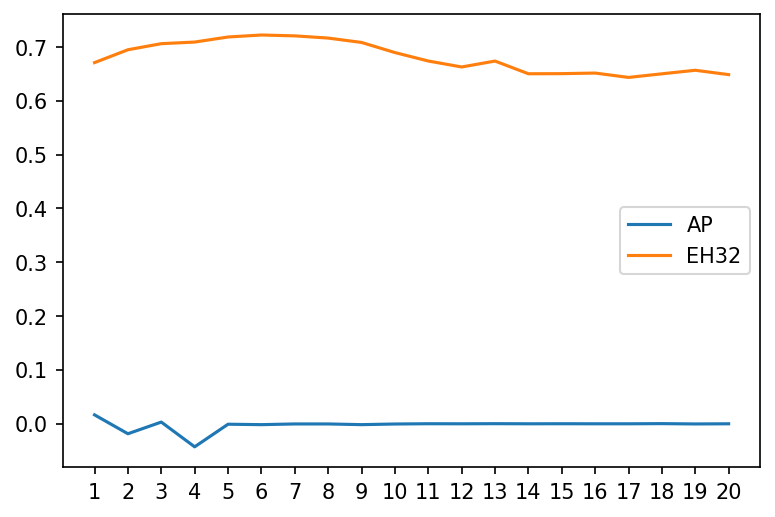

In [ ]:
for g in ['AP', 'EH32']:
  x = df[df['group'] == g]['epoch']
  y = df[df['group'] == g]['val_pearsonr']
  plt.plot(x, y, label = g)
plt.legend()

## Average pooling vs. multiple expression heads on 10% data

In [ ]:
creds, _ = default()
gc = gspread.authorize(creds)
sh = gc.open('proformer_project')

In [ ]:
worksheet = sh.worksheet("d512_b4")

In [ ]:
rows = worksheet.get_all_values()
df = pd.DataFrame.from_records(rows[1:])
df.columns = rows[0]
df['epoch'] = df['epoch'].astype('category')
df['pearsonr'] = df['pearsonr'].astype('float32')
df['val_pearsonr'] = df['val_pearsonr'].astype('float32')

### Training

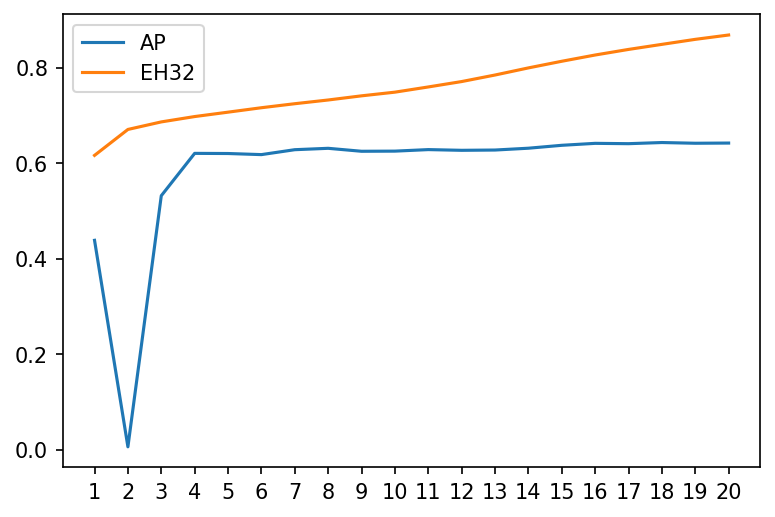

In [ ]:
for g in ['AP', 'EH32']:
  x = df[(df['group'] == g) & (df['data'] == 'pct10')]['epoch']
  y = df[(df['group'] == g) & (df['data'] == 'pct10')]['pearsonr']
  plt.plot(x, y, label = g)
plt.legend()

### Validation

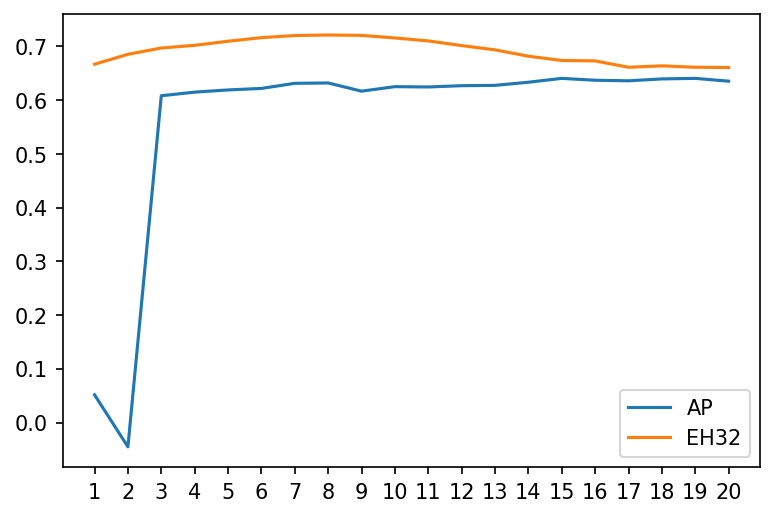

In [ ]:
for g in ['AP', 'EH32']:
  x = df[(df['group'] == g) & (df['data'] == 'pct10')]['epoch']
  y = df[(df['group'] == g) & (df['data'] == 'pct10')]['val_pearsonr']
  plt.plot(x, y, label = g)
plt.legend()

## Average pooling vs. multiple expression heads on full data

In [ ]:
worksheet = sh.worksheet("d512_b4")

In [ ]:
rows = worksheet.get_all_values()
df = pd.DataFrame.from_records(rows[1:])
df.columns = rows[0]
df['epoch'] = df['epoch'].astype('category')
df['pearsonr'] = df['pearsonr'].astype('float32')
df['val_pearsonr'] = df['val_pearsonr'].astype('float32')

### Training

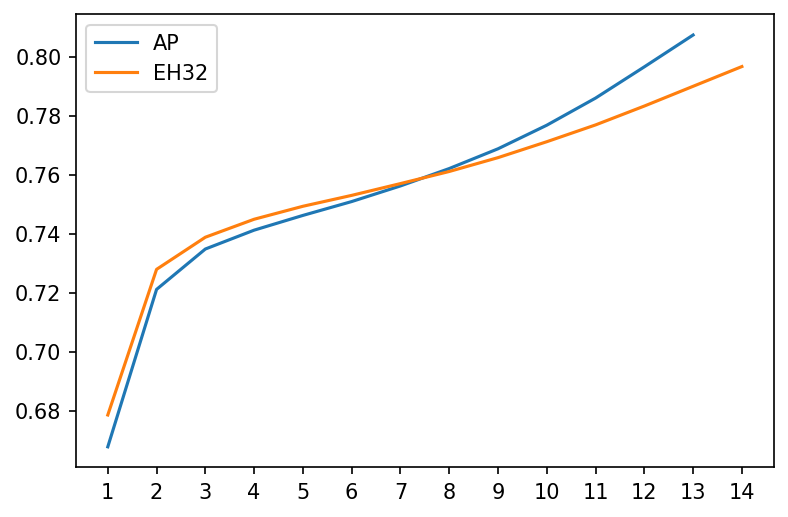

In [ ]:
for g in ['AP', 'EH32']:
  x = df[(df['group'] == g) & (df['data'] == 'full')]['epoch']
  y = df[(df['group'] == g) & (df['data'] == 'full')]['pearsonr']
  plt.plot(x, y, label = g)
plt.legend()

### Validation

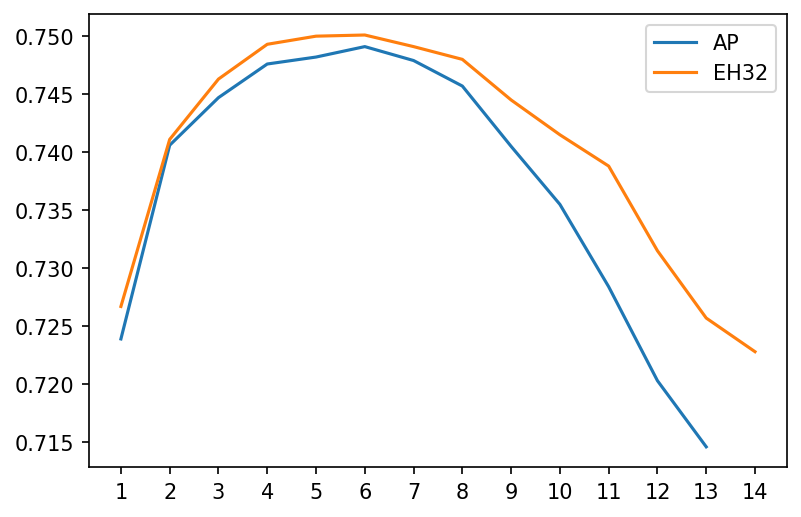

In [ ]:
for g in ['AP', 'EH32']:
  x = df[(df['group'] == g) & (df['data'] == 'full')]['epoch']
  y = df[(df['group'] == g) & (df['data'] == 'full')]['val_pearsonr']
  plt.plot(x, y, label = g)
plt.legend()